**Part 01-Simple bandit problem with stationary reward distributions**





In [39]:
import numpy as np
import matplotlib.pyplot as plt

k = 10
n_problems = 1000
n_steps = 1000

In [40]:
# Function to generate means for the k-armed bandit
def generate_means(k):
    return np.random.normal(0, 1, k)

In [41]:
# Function to generate rewards based on the means
def generate_rewards(means):
    return np.random.normal(means, 1)

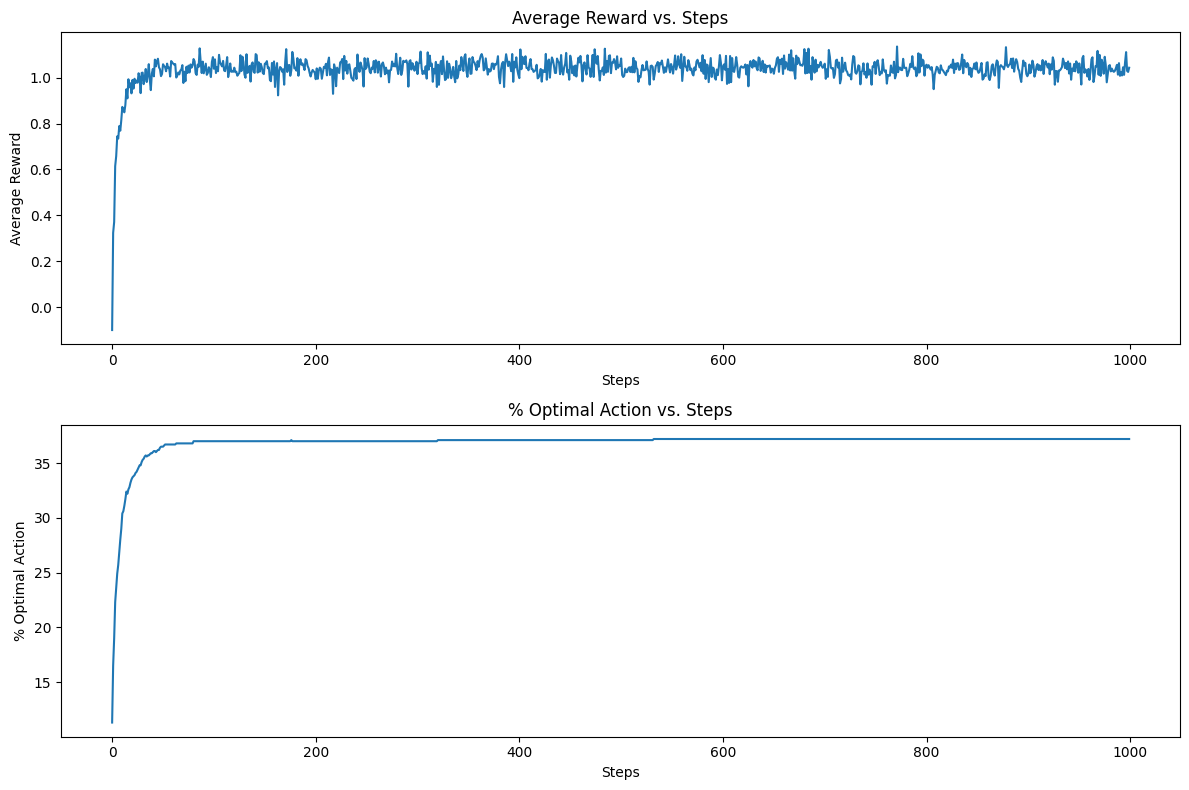

In [ ]:
# Greedy algorithm with non-optimistic initial values
def greedy_non_optimistic(k, n_steps, n_problems):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)  # Generate means for the k-armed bandit
        action_values = np.zeros(k)  # Initialize action value estimates to 0
        action_counts = np.zeros(k)  # Initialize action counts to 0

        for step in range(n_steps):
            action = np.argmax(action_values)  # Select the action with the highest estimated value
            reward = generate_rewards(means)[action]  # Generate the reward for the chosen action

            rewards[p, step] = reward  # Store the reward
            optimal_action_counts[p, step] = (action == np.argmax(means))  # Check if the optimal action was chosen

            action_counts[action] += 1  # Update the action count
            # Update the action value estimate using the incremental method
            action_values[action] += (reward - action_values[action]) / action_counts[action]

    return rewards, optimal_action_counts


# Run the algorithm
greedy_rewards, greedy_optimal_action_counts = greedy_non_optimistic(k, n_steps, n_problems)

# Calculate average rewards and optimal action percentages
avg_rewards = np.mean(greedy_rewards, axis=0)
avg_optimal_action_percentage = np.mean(greedy_optimal_action_counts, axis=0) * 100

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(avg_rewards)
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps')

plt.subplot(2, 1, 2)
plt.plot(avg_optimal_action_percentage)
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action vs. Steps')

plt.tight_layout()
plt.show()


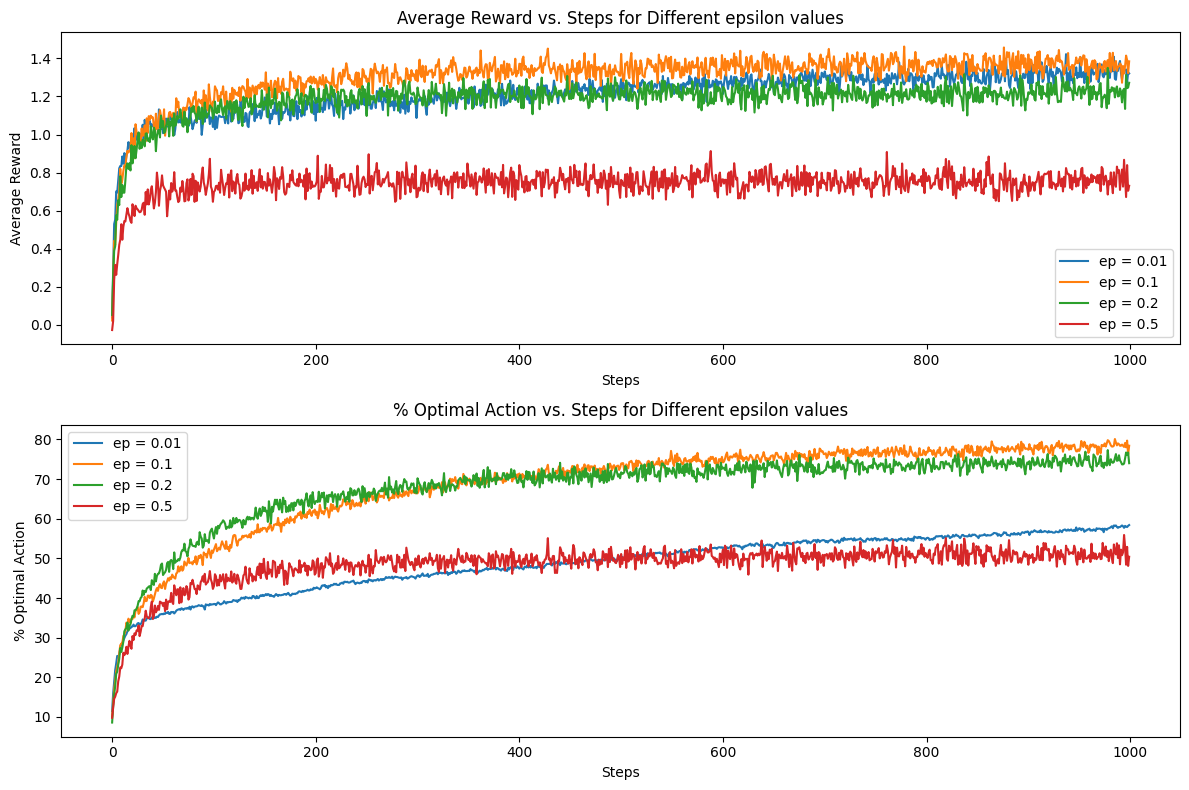

In [ ]:
# Epsilon-greedy algorithm
def epsilon_greedy(k, n_steps, n_problems, ep):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)  # Generate means for the k-armed bandit
        action_values = np.zeros(k)  # Initialize action value estimates to 0
        action_counts = np.zeros(k)  # Initialize action counts to 0

        for step in range(n_steps):
            if np.random.rand() < ep:
                action = np.random.randint(k)  # Explore: select a random action
            else:
                action = np.argmax(action_values)  # Exploit: select the best-known action

            reward = generate_rewards(means)[action]  # Generate the reward for the chosen action

            rewards[p, step] = reward  # Store the reward
            optimal_action_counts[p, step] = (action == np.argmax(means))  # Check if the optimal action was chosen

            action_counts[action] += 1  # Update the action count
            # Update the action value estimate using the incremental method
            action_values[action] += (reward - action_values[action]) / action_counts[action]

    return rewards, optimal_action_counts

# Function to run the epsilon-greedy algorithm with different epsilon values
def run_epsilon_greedy_experiments(k, n_steps, n_problems, ep_values):
    results = {}
    for ep in ep_values:
        rewards, optimal_action_counts = epsilon_greedy(k, n_steps, n_problems, ep)
        avg_rewards = np.mean(rewards, axis=0)
        avg_optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
        results[ep] = (avg_rewards, avg_optimal_action_percentage)
    return results

ep_values = [0.01, 0.1, 0.2, 0.5]  # Different epsilon values to test

# Run the experiments
epsilon_results = run_epsilon_greedy_experiments(k, n_steps, n_problems, ep_values)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot average rewards for different epsilon values
plt.subplot(2, 1, 1)
for ep in ep_values:
    avg_rewards, _ = epsilon_results[ep]
    plt.plot(avg_rewards, label=f'ep = {ep}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps for Different epsilon values')
plt.legend()

# Plot optimal action percentages for different epsilon values
plt.subplot(2, 1, 2)
for ep in ep_values:
    _, avg_optimal_action_percentage = epsilon_results[ep]
    plt.plot(avg_optimal_action_percentage, label=f'ep = {ep}')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action vs. Steps for Different epsilon values')
plt.legend()

plt.tight_layout()
plt.show()

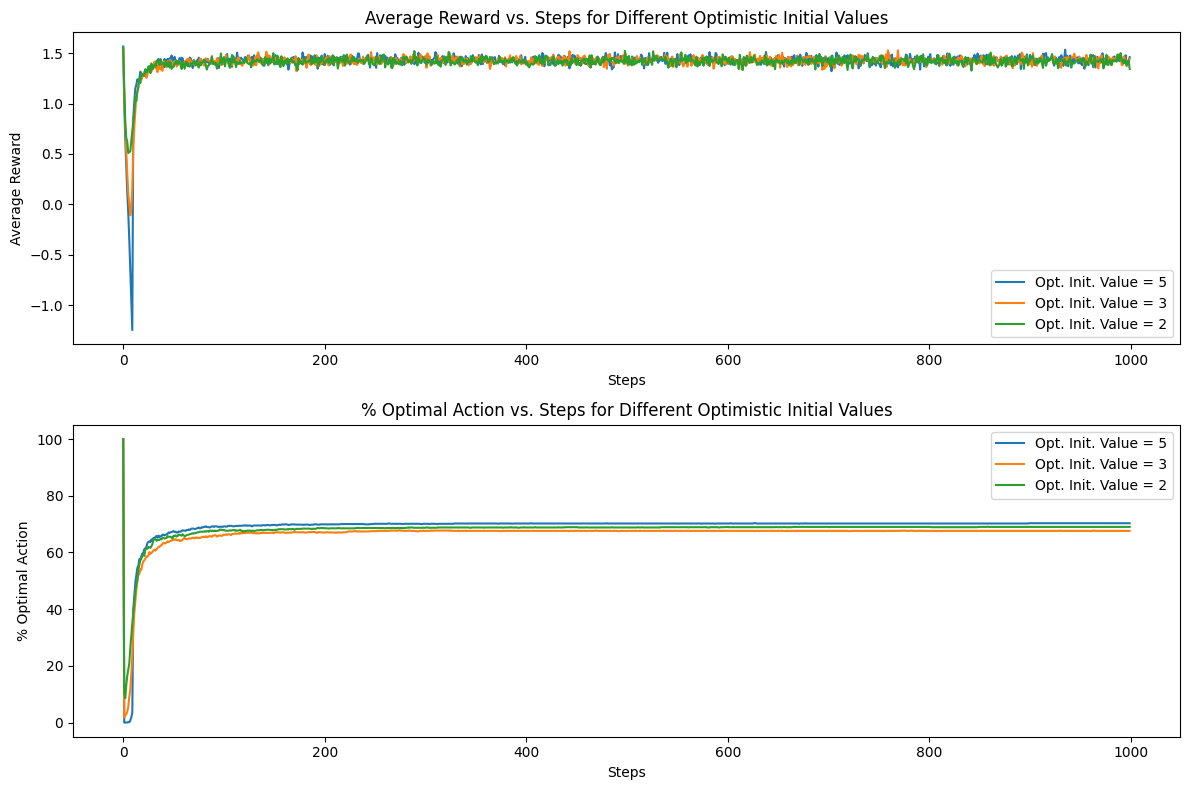

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate means for the k-armed bandit
def generate_means(k):
    return np.random.normal(0, 1, k)

# Function to generate rewards based on the means
def generate_rewards(means):
    return np.random.normal(means, 1)

# Optimistic Greedy
def optimistic_greedy(k, n_steps, n_problems, opt_int_val):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)
        action_values = means + opt_int_val  # Set optimistic initial values based on known means
        action_counts = np.zeros(k)

        for step in range(n_steps):
            action = np.argmax(action_values)
            reward = generate_rewards(means)[action]

            rewards[p, step] = reward
            optimal_action_counts[p, step] = (action == np.argmax(means))

            action_counts[action] += 1
            action_values[action] += (reward - action_values[action]) / action_counts[action]

    return rewards, optimal_action_counts

# Function to run the optimistic greedy algorithm for different initial values
def run_optimistic_greedy_experiments(k, n_steps, n_problems, opt_int_vals):
    results = {}
    for opt_int_val in opt_int_vals:
        rewards, optimal_action_counts = optimistic_greedy(k, n_steps, n_problems, opt_int_val)
        avg_rewards = np.mean(rewards, axis=0)
        avg_optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
        results[opt_int_val] = (avg_rewards, avg_optimal_action_percentage)
    return results

opt_int_vals = [5, 3, 2]  # Different optimistic initial values to test

# Run the experiments
optimistic_results = run_optimistic_greedy_experiments(k, n_steps, n_problems, opt_int_vals)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot average rewards for different optimistic initial values
plt.subplot(2, 1, 1)
for opt_int_val in opt_int_vals:
    avg_rewards, _ = optimistic_results[opt_int_val]
    plt.plot(avg_rewards, label=f'Opt. Init. Value = {opt_int_val}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps for Different Optimistic Initial Values')
plt.legend()

# Plot optimal action percentages for different optimistic initial values
plt.subplot(2, 1, 2)
for opt_int_val in opt_int_vals:
    _, avg_optimal_action_percentage = optimistic_results[opt_int_val]
    plt.plot(avg_optimal_action_percentage, label=f'Opt. Init. Value = {opt_int_val}')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action vs. Steps for Different Optimistic Initial Values')
plt.legend()

plt.tight_layout()
plt.show()


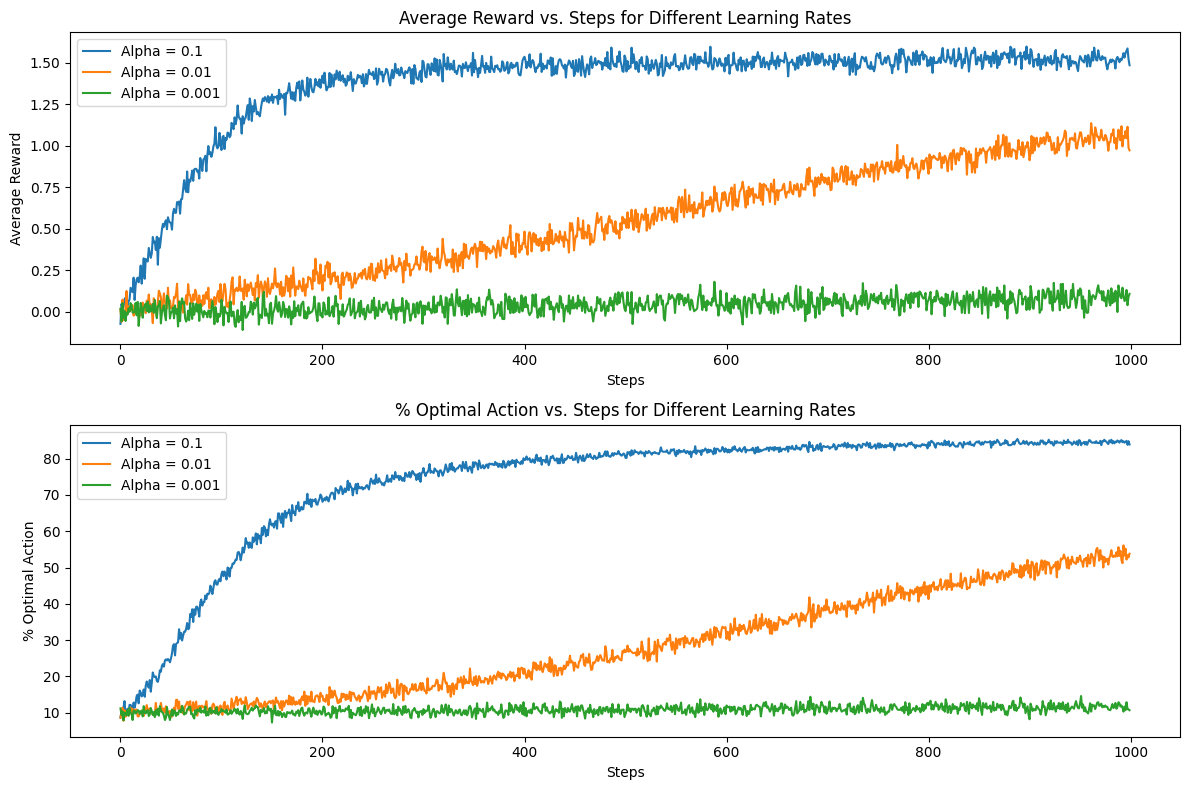

In [43]:
# Gradient Bandit algorithm
def gradient_bandit(k, n_steps, n_problems, alpha):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)  # Generate means for the k-armed bandit
        preferences = np.zeros(k)  # Initialize preferences to 0
        average_reward = 0  # Initialize the average reward

        for step in range(n_steps):
            exp_preferences = np.exp(preferences)
            action_probabilities = exp_preferences / np.sum(exp_preferences)  # Softmax to get action probabilities

            action = np.random.choice(k, p=action_probabilities)  # Choose action based on probabilities
            reward = generate_rewards(means)[action]  # Generate reward for the chosen action

            rewards[p, step] = reward  # Store the reward
            optimal_action_counts[p, step] = (action == np.argmax(means))  # Check if the optimal action was chosen

            # Update preferences
            for a in range(k):
                if a == action:
                    preferences[a] += alpha * (reward - average_reward) * (1 - action_probabilities[a])
                else:
                    preferences[a] -= alpha * (reward - average_reward) * action_probabilities[a]

            # Update average reward
            average_reward += (reward - average_reward) / (step + 1)

    return rewards, optimal_action_counts

# Function to run the gradient bandit algorithm with different learning rates
def run_gradient_bandit_experiments(k, n_steps, n_problems, alphas):
    results = {}
    for alpha in alphas:
        rewards, optimal_action_counts = gradient_bandit(k, n_steps, n_problems, alpha)
        avg_rewards = np.mean(rewards, axis=0)
        avg_optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
        results[alpha] = (avg_rewards, avg_optimal_action_percentage)
    return results

alphas = [0.1, 0.01, 0.001]  # Different learning rates to test

# Run the experiments
gradient_bandit_results = run_gradient_bandit_experiments(k, n_steps, n_problems, alphas)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot average rewards for different learning rates
plt.subplot(2, 1, 1)
for alpha in alphas:
    avg_rewards, _ = gradient_bandit_results[alpha]
    plt.plot(avg_rewards, label=f'Alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps for Different Learning Rates')
plt.legend()

# Plot optimal action percentages for different learning rates
plt.subplot(2, 1, 2)
for alpha in alphas:
    _, avg_optimal_action_percentage = gradient_bandit_results[alpha]
    plt.plot(avg_optimal_action_percentage, label=f'Alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action vs. Steps for Different Learning Rates')
plt.legend()

plt.tight_layout()
plt.show()

**All Plots**

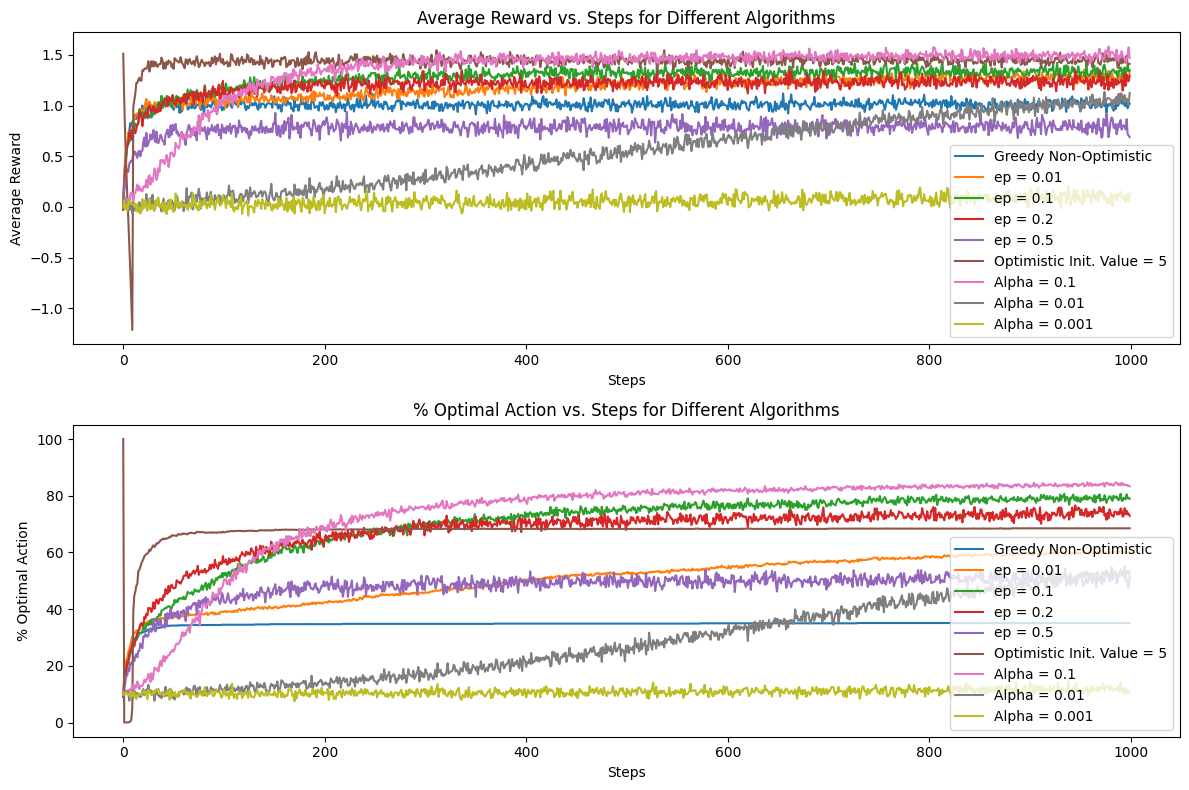

In [45]:
# Greedy algorithm with non-optimistic initial values
def greedy_non_optimistic(k, n_steps, n_problems):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)
        action_values = np.zeros(k)
        action_counts = np.zeros(k)

        for step in range(n_steps):
            action = np.argmax(action_values)
            reward = generate_rewards(means)[action]

            rewards[p, step] = reward
            optimal_action_counts[p, step] = (action == np.argmax(means))

            action_counts[action] += 1
            action_values[action] += (reward - action_values[action]) / action_counts[action]

    return rewards, optimal_action_counts

# Epsilon-greedy algorithm
def epsilon_greedy(k, n_steps, n_problems, ep):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)
        action_values = np.zeros(k)
        action_counts = np.zeros(k)

        for step in range(n_steps):
            if np.random.rand() < ep:
                action = np.random.randint(k)
            else:
                action = np.argmax(action_values)

            reward = generate_rewards(means)[action]

            rewards[p, step] = reward
            optimal_action_counts[p, step] = (action == np.argmax(means))

            action_counts[action] += 1
            action_values[action] += (reward - action_values[action]) / action_counts[action]

    return rewards, optimal_action_counts

# Optimistic Greedy
def optimistic_greedy(k, n_steps, n_problems, opt_int_val):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)
        action_values = means + opt_int_val
        action_counts = np.zeros(k)

        for step in range(n_steps):
            action = np.argmax(action_values)
            reward = generate_rewards(means)[action]

            rewards[p, step] = reward
            optimal_action_counts[p, step] = (action == np.argmax(means))

            action_counts[action] += 1
            action_values[action] += (reward - action_values[action]) / action_counts[action]

    return rewards, optimal_action_counts

# Gradient Bandit algorithm
def gradient_bandit(k, n_steps, n_problems, alpha):
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))

    for p in range(n_problems):
        means = generate_means(k)
        preferences = np.zeros(k)
        average_reward = 0

        for step in range(n_steps):
            exp_preferences = np.exp(preferences)
            action_probabilities = exp_preferences / np.sum(exp_preferences)

            action = np.random.choice(k, p=action_probabilities)
            reward = generate_rewards(means)[action]

            rewards[p, step] = reward
            optimal_action_counts[p, step] = (action == np.argmax(means))

            for a in range(k):
                if a == action:
                    preferences[a] += alpha * (reward - average_reward) * (1 - action_probabilities[a])
                else:
                    preferences[a] -= alpha * (reward - average_reward) * action_probabilities[a]

            average_reward += (reward - average_reward) / (step + 1)

    return rewards, optimal_action_counts

# Run the greedy_non_optimistic algorithm
greedy_rewards, greedy_optimal_action_counts = greedy_non_optimistic(k, n_steps, n_problems)
avg_greedy_rewards = np.mean(greedy_rewards, axis=0)
avg_greedy_optimal_action_percentage = np.mean(greedy_optimal_action_counts, axis=0) * 100

# Run the epsilon_greedy algorithm with different epsilon values
ep_values = [0.01, 0.1, 0.2, 0.5]
epsilon_results = {}
for ep in ep_values:
    rewards, optimal_action_counts = epsilon_greedy(k, n_steps, n_problems, ep)
    avg_rewards = np.mean(rewards, axis=0)
    avg_optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
    epsilon_results[ep] = (avg_rewards, avg_optimal_action_percentage)

# Run the optimistic_greedy algorithm with an initial value of 5
optimistic_rewards, optimistic_optimal_action_counts = optimistic_greedy(k, n_steps, n_problems, 5)
avg_optimistic_rewards = np.mean(optimistic_rewards, axis=0)
avg_optimistic_optimal_action_percentage = np.mean(optimistic_optimal_action_counts, axis=0) * 100

# Run the gradient_bandit algorithm with different learning rates
alphas = [0.1, 0.01, 0.001]
gradient_bandit_results = {}
for alpha in alphas:
    rewards, optimal_action_counts = gradient_bandit(k, n_steps, n_problems, alpha)
    avg_rewards = np.mean(rewards, axis=0)
    avg_optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
    gradient_bandit_results[alpha] = (avg_rewards, avg_optimal_action_percentage)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot average rewards for all algorithms
plt.subplot(2, 1, 1)
plt.plot(avg_greedy_rewards, label='Greedy Non-Optimistic')
for ep in ep_values:
    avg_rewards, _ = epsilon_results[ep]
    plt.plot(avg_rewards, label=f'ep = {ep}')
plt.plot(avg_optimistic_rewards, label='Optimistic Init. Value = 5')
for alpha in alphas:
    avg_rewards, _ = gradient_bandit_results[alpha]
    plt.plot(avg_rewards, label=f'Alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Steps for Different Algorithms')
plt.legend()

# Plot optimal action percentages for all algorithms
plt.subplot(2, 1, 2)
plt.plot(avg_greedy_optimal_action_percentage, label='Greedy Non-Optimistic')
for ep in ep_values:
    _, avg_optimal_action_percentage = epsilon_results[ep]
    plt.plot(avg_optimal_action_percentage, label=f'ep = {ep}')
plt.plot(avg_optimistic_optimal_action_percentage, label='Optimistic Init. Value = 5')
for alpha in alphas:
    _, avg_optimal_action_percentage = gradient_bandit_results[alpha]
    plt.plot(avg_optimal_action_percentage, label=f'Alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action vs. Steps for Different Algorithms')
plt.legend()

plt.tight_layout()
plt.show()
